# Probabilistic Analyses - Part II

This document derives analytic expressions for several adversarial Peras scenarios and plots the results.

## Set up

In [1]:
require(data.table)
require(ggplot2)
require(ggExtra)
require(magrittr)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggExtra

Loading required package: magrittr



## Notation

Let $\tau$ be the voting-quorum size and let $U$ be the length (in slots) of a voting round.

Let $\beta$ be the probability of the holder of one lovelace of stake being selected for voting-committee membership. Because this process is binomially distributed, the mean committee size will be $C = T \beta$, where $T$ is the total stake in the blockchain.

Let $H$ be the honest stake and let $f = \frac{T - H}{T}$ be the fraction of adversarial stake

Let $A$ be the certificate-experation time, measured in slots.

Let $\alpha$ be the active-slot coefficient.

## Adversarial quorum

Compute $p_\text{aq}$, the probability of an adversarial quorum in a round.

$$
p_\text{aq} = \sum_{k=\lceil \tau \rceil}^{T-H} {{T - H} \choose{k}} \beta^k (1 - \beta)^{T-H-k} \\
 \approx \left( 1 - N_\text{CDF} \left( \frac{\tau - (T - H) \beta}{\sqrt{(T - H) \beta (1 - \beta)}} \right) \right) \\
 \approx N_\text{CDF} \left( - \left( \frac{3}{4} - f \right) \sqrt{\frac{C}{f}} \right) \\
 \approx \frac{4}{3 - 4 f} \sqrt{\frac{f}{2 \pi C}} e^{- \frac{(3 - 4 f)^ 2 C}{32 f}}
$$

, where we require a quorum size $\tau = \frac{3}{4} C$.

In [21]:
paq <- CJ(f=1:250/1000, C=1:100*10)
paq[, P_aq:=pnorm(- (3/4 -f) * sqrt(C/f))]
paq[, approx:=4 / (3 - 4 * f) * sqrt(f / 2 / pi / C) * exp(- (3 - 4 * f)^2 * C / 32 / f)]
paq %>% summary

       f                C               P_aq               approx         
 Min.   :0.0010   Min.   :  10.0   Min.   :0.000e+00   Min.   :0.000e+00  
 1st Qu.:0.0630   1st Qu.: 257.5   1st Qu.:0.000e+00   1st Qu.:0.000e+00  
 Median :0.1255   Median : 505.0   Median :0.000e+00   Median :0.000e+00  
 Mean   :0.1255   Mean   : 505.0   Mean   :6.291e-07   Mean   :6.772e-07  
 3rd Qu.:0.1880   3rd Qu.: 752.5   3rd Qu.:0.000e+00   3rd Qu.:0.000e+00  
 Max.   :0.2500   Max.   :1000.0   Max.   :7.827e-04   Max.   :8.500e-04  

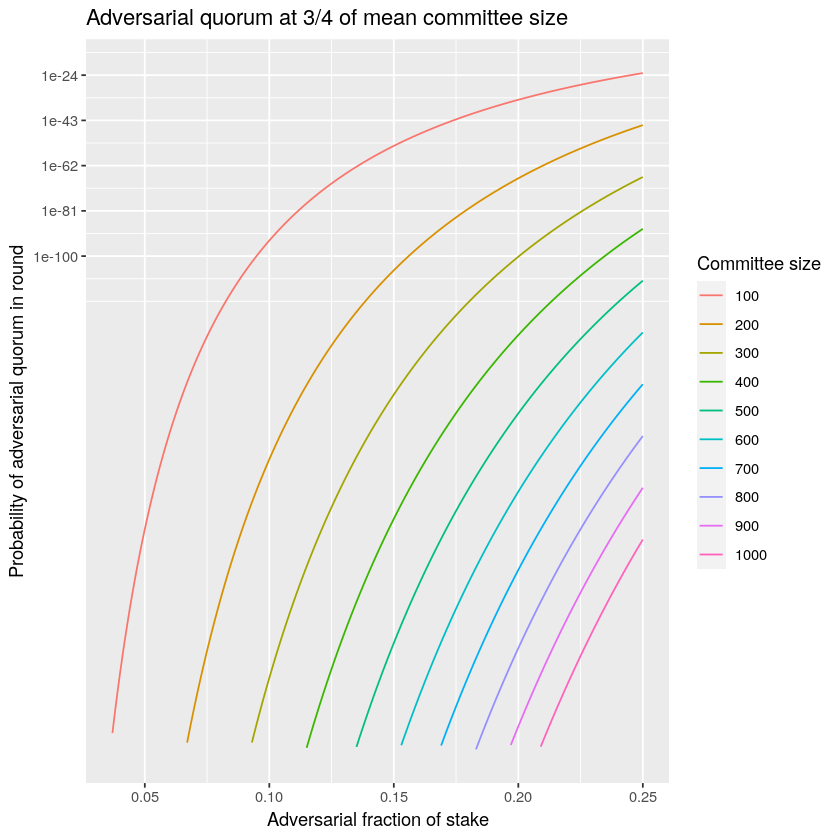

In [24]:
ggplot(paq[`C` %in% (1:10*100)][P_aq > 0], aes(x=`f`, y=`P_aq`, color=factor(C))) +
  geom_line() +
  scale_y_log10() +
  xlab("Adversarial fraction of stake") +
  ylab("Probability of adversarial quorum in round") +
  guides(color=guide_legend(title="Committee size")) +
  ggtitle("Adversarial quorum at 3/4 of mean committee size")

In [25]:
ggsave(filename="paq-line.png", width=6, height=4, dpi=200, units="in")
ggsave(filename="paq-line.svg", width=6, height=4, dpi=200, units="in")

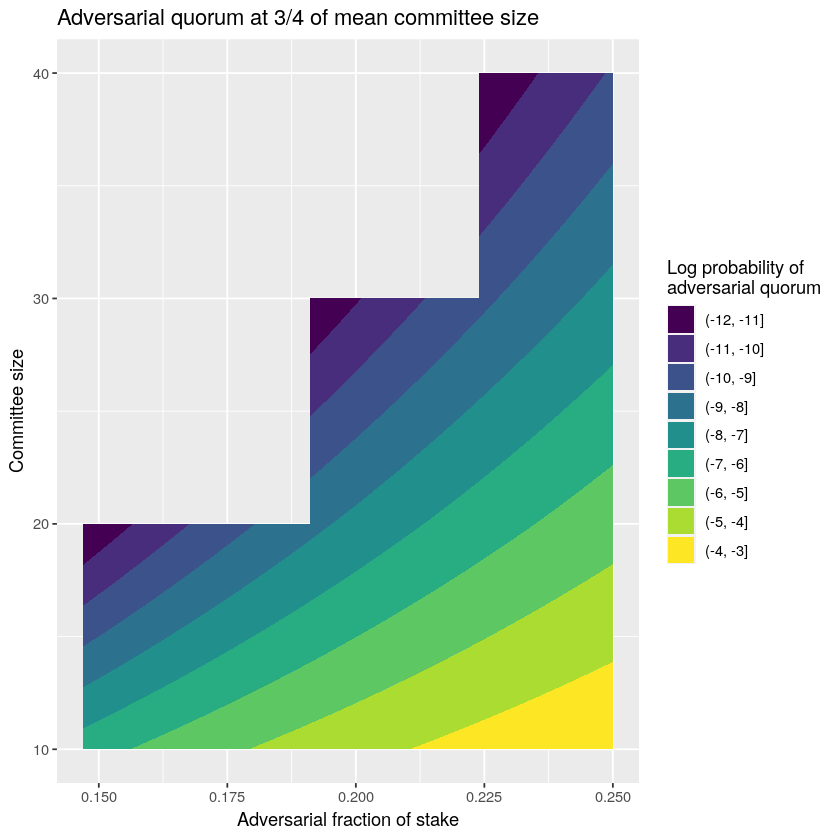

In [29]:
ggplot(paq[P_aq > 1e-12], aes(f, C, z=log10(P_aq))) +
  geom_contour_filled() +
  xlab("Adversarial fraction of stake") +
  ylab("Committee size") +
  guides(fill=guide_legend(title="Log probability of\nadversarial quorum")) +
  ggtitle("Adversarial quorum at 3/4 of mean committee size")

In [30]:
ggsave(filename="paq-contour.png", width=6, height=4, dpi=200, units="in")
ggsave(filename="paq-contour.svg", width=6, height=4, dpi=200, units="in")

## Half of honest votes and all of adversarial votes make a quorum

To be computed.